In [1]:
%pip install sklearn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches 
import pylab as pl
import numpy as np 
import csv
import pandas as pd
datos = pd.read_csv('H1N1_Flu_Vaccines.csv', on_bad_lines='skip', sep= ';')
datos.head(100)

datos.opinion_h1n1_risk=datos.opinion_h1n1_risk.fillna(0)
datos.opinion_h1n1_sick_from_vacc=datos.opinion_h1n1_sick_from_vacc.fillna(0)
datos.opinion_seas_vacc_effective=datos.opinion_seas_vacc_effective.fillna(0)
datos.opinion_h1n1_vacc_effective=datos.opinion_h1n1_vacc_effective.fillna(0)
datos.opinion_h1n1_risk=datos.opinion_h1n1_risk.astype(int)
datos.opinion_h1n1_sick_from_vacc=datos.opinion_h1n1_sick_from_vacc.astype(int)
datos.opinion_seas_vacc_effective=datos.opinion_seas_vacc_effective.astype(int)
datos.opinion_h1n1_vacc_effective=datos.opinion_h1n1_vacc_effective.astype(int)

X = datos[['opinion_h1n1_risk','opinion_h1n1_sick_from_vacc']].values
y = datos['opinion_seas_vacc_effective'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 100
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))



Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.45


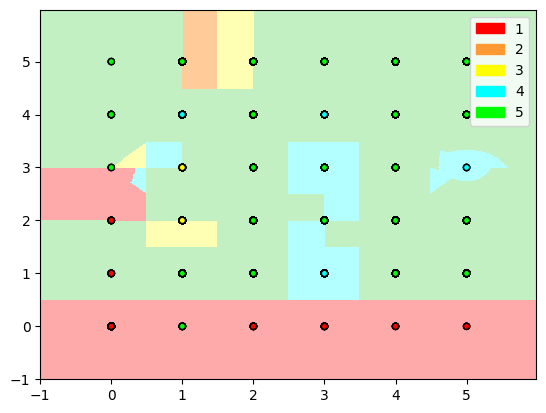

In [21]:
h = .02  

# Se crean los colores de los mapas
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# creamos una instancia de Neighbors Classifier y ajustamos los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Trazar el límite de decisión. Para eso, asignaremos un color a cada
# Puntos en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Se aplican los colores en los resultados graficos.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# se plotean todos los puntos de entrenamiento.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

plt.show()

([<matplotlib.axis.XTick at 0x182c3a80dc0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25')])

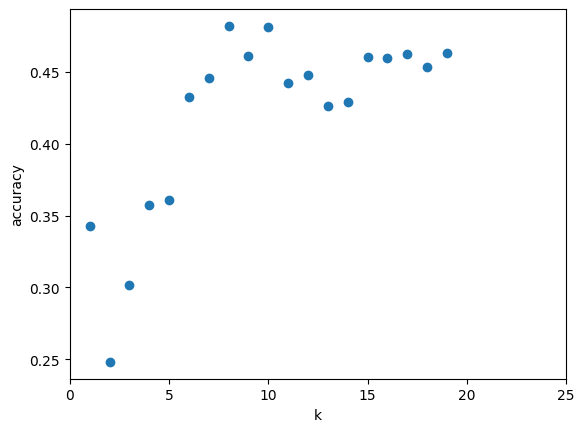

In [22]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])